<a href="https://colab.research.google.com/github/sayanbanerjee32/lang_detect/blob/main/fastai_133_langs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount gdrive for data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# file locations
tar_file_loc = '/content/drive/MyDrive/lang_detection/data/sentences.tar.bz2'
dest_loc = '/tmp'
file_name = 'sentences.csv'
num_languages = 133
model_save_path = '/content/drive/MyDrive/lang_detection/models/'

In [ ]:
%%capture
!pip install fastai -Uq

In [ ]:
import pandas as pd
import tarfile
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [ ]:
# extrtract tar file
tar = tarfile.open(tar_file_loc, "r:bz2")  
tar.extractall(path = dest_loc)
tar.close()

In [ ]:
# read lines to understand structure
with open(dest_loc +'/' + file_name) as file:
    lines = file.readlines()
    lines = [line.strip() for line in lines]

In [ ]:
# see few samples
lines[0:10]

['1\tcmn\t我們試試看！',
 '2\tcmn\t我该去睡觉了。',
 '3\tcmn\t你在干什麼啊？',
 '4\tcmn\t這是什麼啊？',
 '5\tcmn\t今天是６月１８号，也是Muiriel的生日！',
 '6\tcmn\t生日快乐，Muiriel！',
 '7\tcmn\tMuiriel现在20岁了。',
 '8\tcmn\t密码是"Muiriel"。',
 '9\tcmn\t我很快就會回來。',
 '10\tcmn\t我不知道。']

In [ ]:
# read data in pandas
sent_df = pd.read_csv(dest_loc +'/' + file_name, sep = '\t', names = ['id','label','text'])
sent_df.head()

,id,label,text
0,1,cmn,我們試試看！
1,2,cmn,我该去睡觉了。
2,3,cmn,你在干什麼啊？
3,4,cmn,這是什麼啊？
4,5,cmn,今天是６月１８号，也是Muiriel的生日！


In [ ]:
# is there blank label
sent_df['label'].fillna('unk',inplace  = True)
sent_df.loc[sent_df['label'] == 'unk',:]

,id,label,text
387366,404564,unk,Lèu gāi dịdiang?
387368,404566,unk,Kuăilāk sí mitgāi?
387372,404570,unk,Dó Hānggok nạng dăn mitgāi uẹ?
388306,405522,unk,Lèu kiá dịgŏ?
388307,405523,unk,Lèu miān mitgāi?
388308,405524,unk,Uà sí Diōjiunāng.
4655179,4962310,unk,厝漏閣抵著透暝雨。
5786464,6142175,unk,我昨暗睏十一點鐘久。
5786465,6142176,unk,阮阿叔有去過芬蘭。
5786466,6142177,unk,阮佇厝裡攏講台語。


In [ ]:
# is there blank texts
sent_df.loc[sent_df['text'].isnull(),:].shape, sent_df.loc[sent_df['text'] == '',:].shape

((0, 3), (0, 3))

In [ ]:
# remove records where label not known
sent_df = sent_df.loc[sent_df['label'] != 'unk',:]
len(sent_df['label'].unique())

402

In [ ]:
# create test split
def get_train_test_split(df):
    train_ids, test_ids = next(StratifiedKFold(n_splits=5,random_state=1).split(df.id, df.label))
    print(f"Test: {len(test_ids)}, Train: {len(train_ids)}, Total: {len(df)}")
    dummy = [False] * len(df)
    com_list = dummy[:]
    for index in test_ids: com_list[index] = True
    return com_list

In [ ]:
train_test_bool = get_train_test_split(sent_df)
sum(train_test_bool)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Test: 1977424, Train: 7909695, Total: 9887119


1977424

In [ ]:
# keep test separate
test_df = sent_df.loc[train_test_bool,:]
test_df.shape

(1977424, 3)

In [ ]:
# Training df
train_df = sent_df.loc[list(~np.array(train_test_bool)),:]
train_df.shape

(7909695, 3)

In [ ]:
# is validation identified
train_df['is_valid'] = get_train_test_split(train_df)
train_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Test: 1581939, Train: 6327756, Total: 7909695


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,label,text,is_valid
111285,116355,jpn,彼の発言で私の希望は失われた。,True
111286,116356,jpn,彼の発言が舌戦の火蓋を切った。,True
111287,116357,jpn,彼の発言がゴタゴタを起こした。,True
111288,116358,jpn,彼の発言が舌戦の火蓋をきったことになった。,True
111289,116359,jpn,彼の発見は輸送における革命をもたらした。,True


(7909695, 7890587)

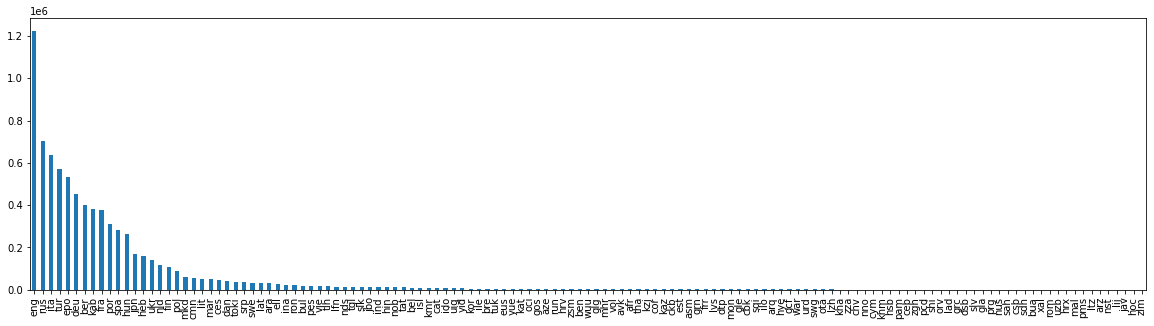

In [ ]:
# create a subsample
cound_df = train_df['label'].value_counts()
sample_labels = cound_df[:num_languages].index.tolist()

train_csv_sample = train_df.loc[train_df['label'].isin(sample_labels),:]
train_csv_sample['label'].value_counts().plot.bar(figsize = [20,5])
len(train_df), len(train_csv_sample)

In [ ]:
# to get an idea how many observations should be kept to deal with the large volume
train_csv_sample['label'].value_counts().median()

3743.0

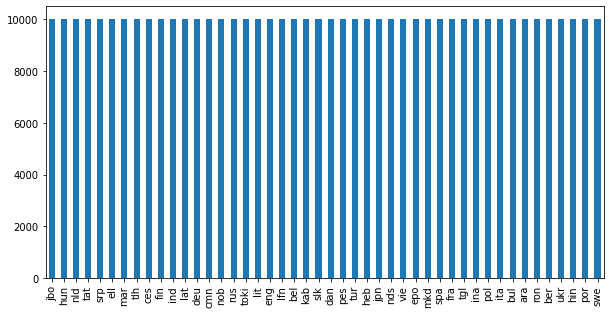

In [ ]:
# downsample where number of observations for a language is more than 10000
size = 10000        # sample size
replace = False  # with replacement
dn_smpl_lang = list(train_csv_sample['label'].value_counts()[train_csv_sample['label'].value_counts() > size].index)
train_sub_sample_lg = train_csv_sample.loc[train_csv_sample.label.isin(dn_smpl_lang),:].copy()
np.random.seed(1)
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
train_sub_sample_lg = train_sub_sample_lg.groupby('label', as_index=False).apply(fn)
train_sub_sample_lg['label'].value_counts().plot.bar(figsize = [10,5])

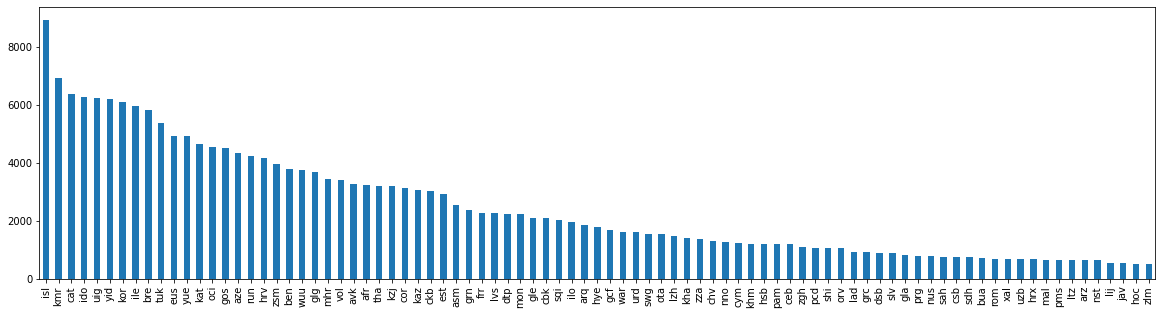

In [ ]:
# distribution where number of observation for each language is less than 10000
train_sub_sample_sh = train_csv_sample.loc[~train_csv_sample.label.isin(dn_smpl_lang),:].copy()
train_sub_sample_sh['label'].value_counts().plot.bar(figsize = [20,5])

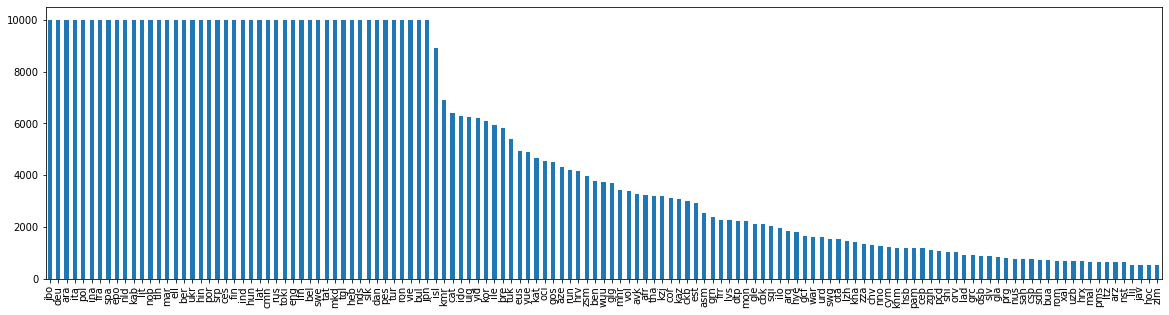

In [ ]:
train_sub_sample = pd.concat([train_sub_sample_lg,train_sub_sample_sh],axis = 0)
train_sub_sample['label'].value_counts().plot.bar(figsize = [20,5])

## Character language model

In [ ]:
from fastai.text.all import *
from fastai.callback.fp16 import *

from pathlib import Path

In [ ]:
# Character tokenizer that will be used by fastai dataloaders

from collections.abc import Iterable

def flatten(l):
    for el in l:
        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el
class CharTokenizer():
        
    def __call__(self, items):
        
        # List where I temporarly store the tokens ['xxbos', 'h', 'e', 'l', 'l', 'o', 'xxeos'] as 
        # they are being parsed.
        final_list = []
        
        # We don't want to mess with the special fastai tokens
        special_chars = ['xxunk','xxpad','xxbos','xxeos','xxfld','xxrep','xxwrep','xxup','xxmaj']
        
        # Break up string into words, if word in special_chars dont touch it. Otherwise break up each
        # word into each character.
        for words in items:
            tmp = list(flatten([list(word) if word not in special_chars else word 
                                                for word in words.split()]))
            # tmp has each token 'xxbos', 'xxmaj', 'h', 'e', 'l', 'l', 'o', ',', 'w', 'h', ....]
            # We need to put the tmp list into another list to generate a generator below
            final_list.append(tmp)
        
        # Returns a generator
        return (t for t in final_list)

### Language model characters

In [ ]:
# cleate data block and data loader for building the language model
data_lm = DataBlock(
            blocks=TextBlock.from_df('text', is_lm=True, tok=CharTokenizer()),
            get_x=ColReader('text'),
            splitter=RandomSplitter(0.1))

dls_lm = data_lm.dataloaders(train_sub_sample) 
# how the data will be presented to the model
dls_lm.show_batch(max_n=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,text_
0,"xxbos ё н у п а р т а д а в о д з і ў , ш т о н е а б х о д н а п р ы н я ц ь п р а п а н о в у , ш т о г э т а г а п а т р а б у е м о м а н т . xxbos","ё н у п а р т а д а в о д з і ў , ш т о н е а б х о д н а п р ы н я ц ь п р а п а н о в у , ш т о г э т а г а п а т р а б у е м о м а н т . xxbos т"
1,a t å g e t . xxbos ส ั ม ภ า ร ะ ข อ ง ฉ ั น ห า ย ไ ป xxbos xxmaj c a n y o u g i v e m e s o m e s p e c i f i c a t i o n s ? xxbos xxmaj t i l m a r d i o ! xxbos,t å g e t . xxbos ส ั ม ภ า ร ะ ข อ ง ฉ ั น ห า ย ไ ป xxbos xxmaj c a n y o u g i v e m e s o m e s p e c i f i c a t i o n s ? xxbos xxmaj t i l m a r d i o ! xxbos xxmaj


In [ ]:
# create language model learner
learn_lm = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.5, 
                                  pretrained=False, #config=config,
                                metrics=[accuracy, Perplexity()]).to_fp16()

SuggestedLRs(valley=0.00013182566908653826)

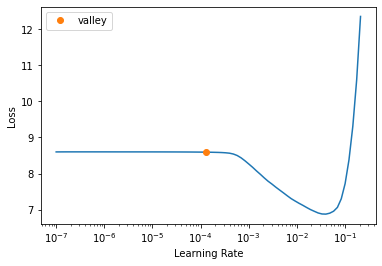

In [ ]:
# find optimum learning rate for language model
learn_lm.lr_find()

In [ ]:
# one cycle training
learn_lm.fit_one_cycle(1, 0.00015)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.221978,3.174739,0.194532,23.920578,17:43


In [ ]:
# unfreeze all the layers and one cycle training
learn_lm.unfreeze()
learn_lm.fit_one_cycle(10, 1.5e-4)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.149780,3.104374,0.205757,22.295252,17:42
1,2.927134,2.899527,0.234863,18.165548,17:40
2,2.774136,2.722217,0.268206,15.214008,17:39
3,2.650188,2.597189,0.298563,13.425941,17:40
4,2.567760,2.506776,0.322631,12.265324,17:45
5,2.511358,2.442284,0.339764,11.499276,17:45
6,2.465531,2.399772,0.350785,11.020668,17:40
7,2.441681,2.375947,0.357599,10.761194,17:39
8,2.433211,2.365963,0.360102,10.654294,17:37
9,2.425033,2.364275,0.360570,10.636327,17:37


In [ ]:
# save language model
learn_lm.save_encoder(Path(model_save_path) /'multiligual_lang_detect')

### Sentence Classifier

In [ ]:
# create data block and data loader for classification model
sent_clas = DataBlock(
    blocks=(TextBlock.from_df('text',tok=CharTokenizer(),vocab=dls_lm.vocab),
            CategoryBlock),
    get_x=ColReader('text'),
    get_y=ColReader('label'),
    splitter=ColSplitter())

dls = sent_clas.dataloaders(train_sub_sample, bs=512, suffle = True)
# how the data will be presented to the model
dls.show_batch(max_n=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxmaj p e o p l e a r e s t a r t i n g t o u n d e r s t a n d t h e g r a v i t y , ” s a i d xxmaj a n d r e a xxmaj s t e r p i n o , t h e o w n e r o f t h e b a r a n d r e s t a u r a n t xxmaj s a n xxmaj r o c c o i n t h e xxmaj l a z i o v i l l a g e o f xxmaj c e l l e n o . 8 6 0 6 1 4 1 e n g “ p e o p l e a",eng
1,"xxbos xxmaj l e a n i m i s m o e s l e c r e d e n t i a p r i m i t i v e o p r i m o r d i a l q u e u n s p i r i t o v i v e n t e s e t r o v a i n t o t e l e o b j e c t o s . xxmaj n o r m a l m e n t e , i s t e s p i r i t o s , i n a l i c u n c u l t u r a , r e c i p e u n c u l t o r e l i g i o",ina


In [ ]:
# macro and weighted f1 scores for each epoch
fscore_weighted = F1Score(average='weighted')
fscore_macro = F1Score(average='macro')

# classifier model
learn_cls = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, 
                                pretrained=False, # not using pre-trained weights
                                metrics=[accuracy,fscore_weighted,fscore_macro]).to_fp16()

In [ ]:
# load trained language model weights
learn_cls = learn_cls.load_encoder(Path(model_save_path) /'multiligual_lang_detect')

SuggestedLRs(valley=0.0012022644514217973)

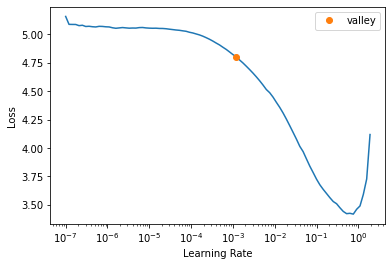

In [ ]:
# find optimum learning rate for classification
learn_cls.lr_find()

In [ ]:
# one cycle training
learn_cls.fit_one_cycle(1, 0.001)

epoch,train_loss,valid_loss,accuracy,f1_score,f1_score,time
0,0.902898,0.718039,0.761734,0.736229,0.595676,05:40


In [ ]:
# unfreeze last two layers and one cycle training with discriminative learning rate
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,f1_score,f1_score,time
0,0.630277,0.502377,0.831854,0.819859,0.742443,05:48
1,0.451556,0.367682,0.874552,0.868522,0.804810,05:48


In [ ]:
# unfreeze last 3 layers and one cycle training with discriminative learning rate
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,f1_score,f1_score,time
0,0.462810,0.357662,0.880396,0.874122,0.813954,06:11
1,0.318072,0.284677,0.905286,0.901704,0.853713,06:11


In [ ]:
# unfreeze all layers and one cycle training with discriminative learning rate
learn_cls.unfreeze()
learn_cls.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,f1_score,f1_score,time
0,0.318053,0.282177,0.906094,0.902406,0.854346,06:31
1,0.288041,0.263055,0.912138,0.909111,0.864742,06:31
2,0.254510,0.252474,0.916049,0.913633,0.872022,06:31
3,0.231451,0.242037,0.919975,0.917812,0.879093,06:33
4,0.213110,0.243134,0.920035,0.917628,0.879698,06:34


## Test

In [ ]:
# sub sample test set data with relevant languages
trained_labels = learn_cls.dls.vocab[1]
# train_sub_sample.label.unique()
test_sub_sample = test_df.loc[test_df['label'].isin(trained_labels)]
test_sub_sample.shape,test_df.shape

((1972648, 3), (1977424, 3))

In [ ]:
# batch prediction form fast ai model
def get_predicted_data(learner, test_df, cat_list):
    test_dl = learner.dls.test_dl(test_df)
    prob_tensor, _, pred_tensor = learner.get_preds(dl = test_dl, with_decoded=True)
    # pred_list = [f"{cat_list[pred_idx]} {prob_idx[pred_idx]}" 
    #              for pred_idx, prob_idx in zip(pred_tensor,prob_tensor)]
    pred_list = [cat_list[pred_idx] for pred_idx in pred_tensor]
    test_df['predicted_label'] = pred_list
    return test_df

In [ ]:
# fast ai model prediction
pred_df = get_predicted_data(learn_cls, test_sub_sample, trained_labels)
pred_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id,label,text,predicted_label
0,1,cmn,我們試試看！,cmn
1,2,cmn,我该去睡觉了。,cmn
2,3,cmn,你在干什麼啊？,cmn
3,4,cmn,這是什麼啊？,cmn
4,5,cmn,今天是６月１８号，也是Muiriel的生日！,cmn


### Performance metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# confusion metrics and classification report
cm = confusion_matrix(pred_df['label'], pred_df['predicted_label'])
print(classification_report(pred_df['label'], pred_df['predicted_label']))

              precision    recall  f1-score   support

         afr       0.37      0.94      0.53       806
         ara       0.95      0.97      0.96      7597
         arq       0.48      0.39      0.43       462
         arz       0.00      0.00      0.00       160
         asm       0.96      0.92      0.94       639
         avk       0.51      0.92      0.66       820
         aze       0.28      0.93      0.43      1081
         bel       0.59      0.97      0.73      2528
         ben       0.95      0.98      0.96       946
         ber       0.59      0.87      0.71    100757
         bre       0.50      0.90      0.64      1454
         bua       0.83      0.82      0.83       181
         bul       0.46      0.91      0.61      4900
         cat       0.39      0.90      0.54      1596
         cbk       0.35      0.79      0.49       525
         ceb       0.38      0.33      0.35       295
         ces       0.96      0.92      0.94     11993
         chv       0.94    

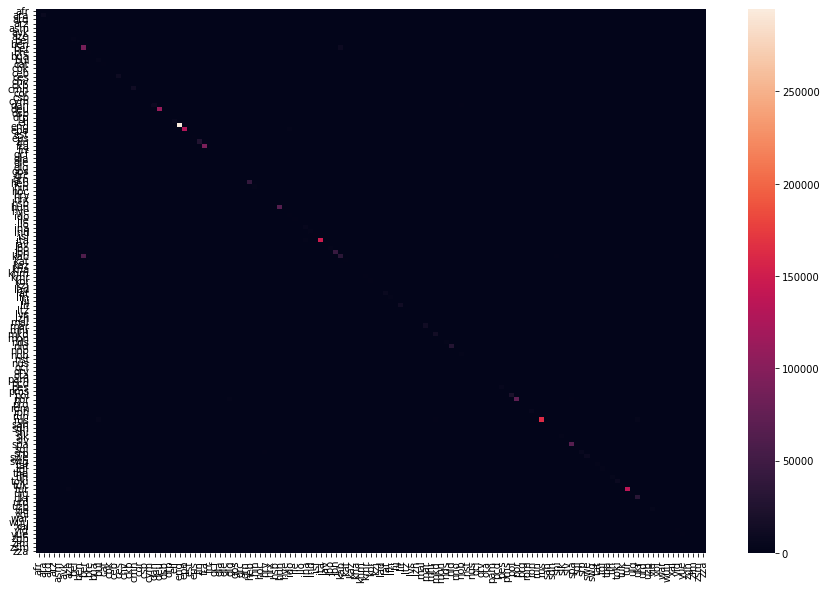

In [ ]:
# heatmap for confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = False, xticklabels=trained_labels,yticklabels=trained_labels)
plt.show()

### Save the model in drive

In [ ]:
# save model for google drive
model_save_path = Path(model_save_path) / 'fastai_133_langs_v3'
model_save_path

Path('/content/drive/MyDrive/lang_detection/models/fastai_133_langs_v3')

In [ ]:
learn_cls.export(model_save_path)